In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170508288/170498071 [==============================] - 11s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [10]:
y_test.shape

(10000, 1)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [14]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

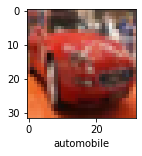

In [15]:
plot_sample(X_train, y_train, 5)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
ann = models.Sequential([
                         layers.Flatten(input_shape=(32,32,3)),
                         layers.Dense(3000, activation='relu'),
                         layers.Dense(1000, activation='relu'),
                         layers.Dense(10, activation='sigmoid')
      ])

ann.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 104s 66ms/step - loss: 1.8090 - accuracy: 0.3545
Epoch 2/10
1563/1563 [==============================] - 101s 65ms/step - loss: 1.6237 - accuracy: 0.4246
Epoch 3/10
1563/1563 [==============================] - 103s 66ms/step - loss: 1.5436 - accuracy: 0.4538
Epoch 4/10
1563/1563 [==============================] - 102s 65ms/step - loss: 1.4847 - accuracy: 0.4781
Epoch 5/10
1563/1563 [==============================] - 108s 69ms/step - loss: 1.4340 - accuracy: 0.4947
Epoch 6/10
1563/1563 [==============================] - 120s 77ms/step - loss: 1.3911 - accuracy: 0.5092
Epoch 7/10
1563/1563 [==============================] - 133s 85ms/step - loss: 1.3525 - accuracy: 0.5255
Epoch 8/10
1563/1563 [==============================] - 105s 67ms/step - loss: 1.3174 - accuracy: 0.5384
Epoch 9/10
1563/1563 [==============================] - 104s 67ms/step - loss: 1.2835 - accuracy: 0.5475
Epoch 10/10
1563/1563 [==============================] 

In [18]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 8s 26ms/step - loss: 1.4279 - accuracy: 0.4969


[1.427903175354004, 0.4968999922275543]

In [19]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.55      0.59      1000
           1       0.83      0.41      0.55      1000
           2       0.36      0.53      0.43      1000
           3       0.29      0.53      0.38      1000
           4       0.42      0.41      0.42      1000
           5       0.41      0.39      0.40      1000
           6       0.67      0.44      0.53      1000
           7       0.63      0.52      0.57      1000
           8       0.76      0.52      0.61      1000
           9       0.52      0.68      0.59      1000

    accuracy                           0.50     10000
   macro avg       0.55      0.50      0.51     10000
weighted avg       0.55      0.50      0.51     10000



In [20]:
cnn = models.Sequential([
                         
                         #CNN
                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2,2)),
                         
                         # Dense
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')
      ])

In [21]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4827 - accuracy: 0.4668
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1465 - accuracy: 0.5959
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0220 - accuracy: 0.6421
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9502 - accuracy: 0.6682
Epoch 5/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8966 - accuracy: 0.6898
Epoch 6/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.8485 - accuracy: 0.7051
Epoch 7/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.8055 - accuracy: 0.7200
Epoch 8/10
1563/1563 [==============================] - 52s 34ms/step - loss: 0.7697 - accuracy: 0.7343
Epoch 9/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.7326 - accuracy: 0.7454
Epoch 10/10
1563/1563 [==============================] - 52s 34m

In [23]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9328 - accuracy: 0.6883


[0.9328256845474243, 0.6883000135421753]

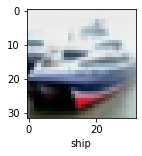

In [24]:
y_test = y_test.reshape(-1,)
plot_sample(X_test, y_test, 1)

In [25]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[3.07479664e-03, 1.30918599e-03, 1.21783964e-01, 6.36444092e-01,
        1.93212251e-03, 1.09757029e-01, 2.41178125e-02, 6.19519851e-05,
        9.57387462e-02, 5.78022934e-03],
       [4.07533441e-03, 3.89811635e-01, 5.88034027e-07, 2.06756667e-05,
        8.35355308e-07, 3.30298207e-07, 4.19732649e-09, 7.33487980e-07,
        6.05475545e-01, 6.14285585e-04],
       [1.22606143e-01, 3.19382250e-01, 4.73055959e-04, 1.44966077e-02,
        1.08540780e-03, 2.42743781e-03, 9.68202017e-04, 5.88147994e-03,
        2.12931827e-01, 3.19747508e-01],
       [7.83815742e-01, 8.04682821e-03, 3.22842933e-02, 1.30919181e-02,
        5.94923180e-03, 1.94324733e-04, 1.61736010e-04, 3.90523492e-05,
        1.55799553e-01, 6.17304235e-04],
       [2.51236288e-05, 4.89704602e-04, 7.94206262e-02, 1.25059441e-01,
        6.16876841e-01, 5.58619015e-02, 1.22016892e-01, 1.34462680e-04,
        8.09209887e-05, 3.41045561e-05]], dtype=float32)

In [26]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 4]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [28]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.76      0.74      1000
           1       0.76      0.84      0.80      1000
           2       0.54      0.61      0.57      1000
           3       0.52      0.45      0.48      1000
           4       0.69      0.58      0.63      1000
           5       0.56      0.64      0.60      1000
           6       0.76      0.80      0.78      1000
           7       0.78      0.71      0.74      1000
           8       0.83      0.72      0.77      1000
           9       0.75      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

